In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Retail_Sales_data - Retail_Sales_data.csv')


In [2]:
df.info()

df.describe()

df.isnull().sum()

df['shopping_mall'].unique()
df['category'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [3]:
df.columns


Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [4]:
# Create a new column for total sales amount
df['sales_amount'] = df['quantity'] * df['price']

region_sales = df.groupby('shopping_mall')['sales_amount'].sum().reset_index()

print(region_sales)


       shopping_mall  sales_amount
0        Cevahir AVM   12645138.20
1  Emaar Square Mall   12406100.29
2     Forum Istanbul   12303921.24
3       Istinye Park   24618827.68
4             Kanyon   50554231.10
5   Mall of Istanbul   50872481.68
6          Metrocity   37302787.33
7       Metropol AVM   25379913.19
8     Viaport Outlet   12521339.72
9       Zorlu Center   12901053.82


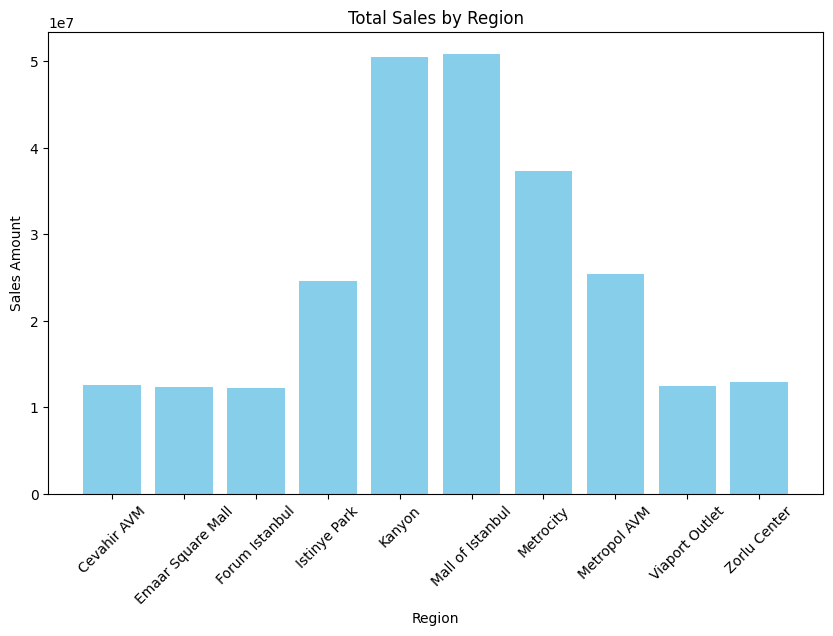

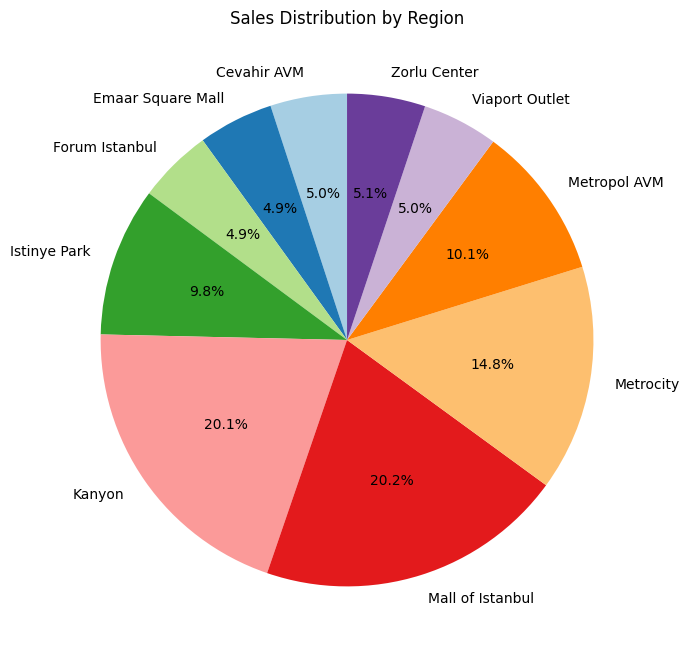

In [5]:
import matplotlib.pyplot as plt

# Bar plot for sales by region
plt.figure(figsize=(10, 6))
plt.bar(region_sales['shopping_mall'], region_sales['sales_amount'], color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

# Pie chart for sales distribution
plt.figure(figsize=(8, 8))
plt.pie(region_sales['sales_amount'], labels=region_sales['shopping_mall'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Region')
plt.show()


In [6]:
top_regions = region_sales.sort_values(by='sales_amount', ascending=False)

print(top_regions.head())


      shopping_mall  sales_amount
5  Mall of Istanbul   50872481.68
4            Kanyon   50554231.10
6         Metrocity   37302787.33
7      Metropol AVM   25379913.19
3      Istinye Park   24618827.68


In [7]:
region_category_sales = df.groupby(['shopping_mall', 'category'])['sales_amount'].sum().unstack()

# Display the result
print(region_category_sales)


category               Books     Clothing   Cosmetics  Food & Beverage  \
shopping_mall                                                            
Cevahir AVM         44541.00   5706321.28   321214.00         44010.45   
Emaar Square Mall   41995.80   5590490.40   338941.76         40610.95   
Forum Istanbul      42056.40   5792444.24   353172.76         39162.24   
Istinye Park        76083.30  11253900.24   655357.88         85918.44   
Kanyon             163029.15  22609527.60  1369550.78        166497.05   
Mall of Istanbul   172240.35  22947417.68  1367517.78        171177.90   
Metrocity          125911.65  17226692.56   991860.04        129902.74   
Metropol AVM        83718.90  11568084.00   680770.38         88638.04   
Viaport Outlet      39632.40   5604594.16   347439.70         41662.18   
Zorlu Center        45343.95   5697318.88   367037.82         41955.06   

category                 Shoes   Souvenir  Technology       Toys  
shopping_mall                               

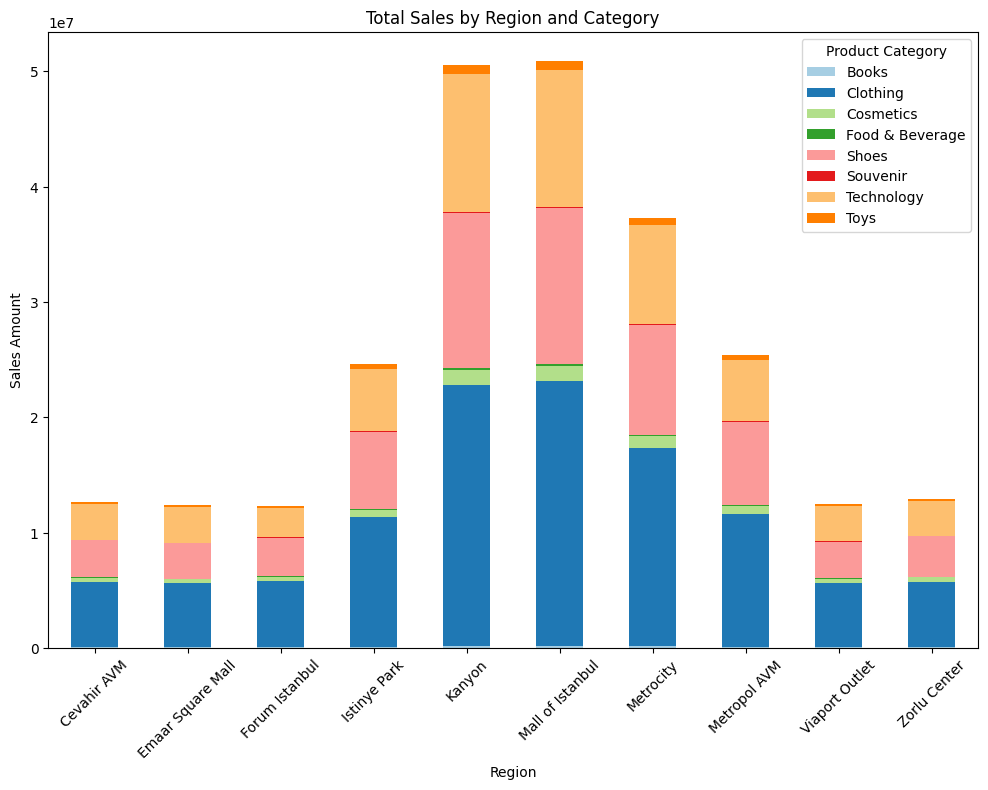

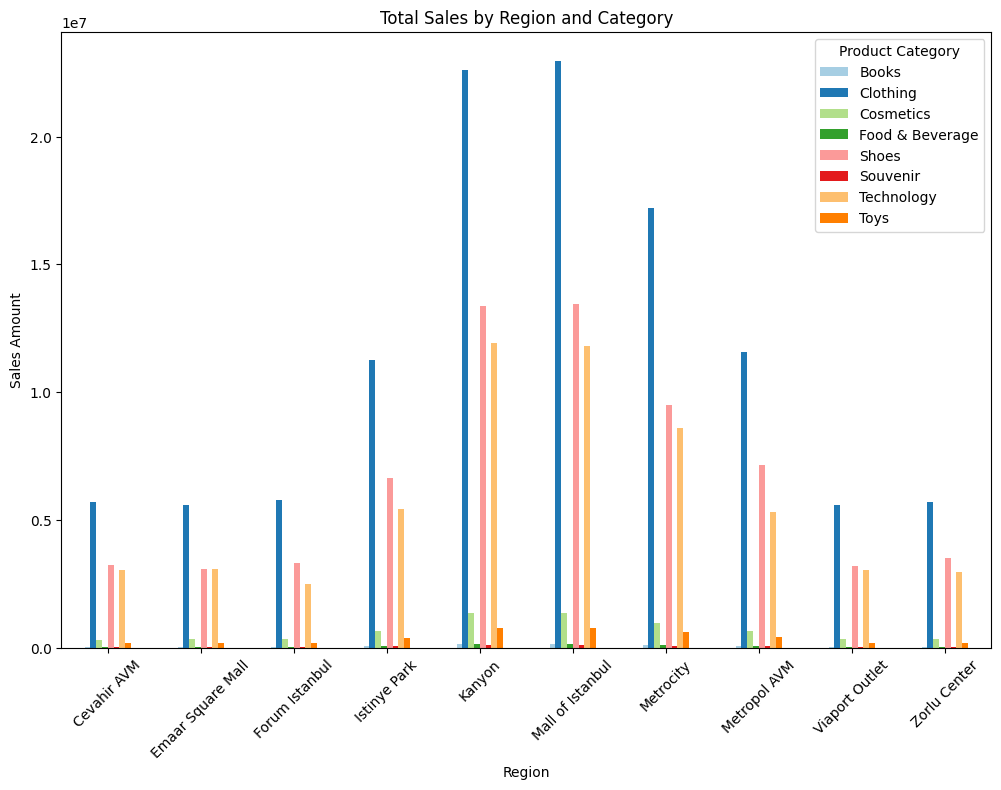

In [8]:
# Stacked bar plot
region_category_sales.plot(kind='bar', stacked=True, figsize=(12, 8), color=plt.cm.Paired.colors)
plt.title('Total Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

# Grouped bar plot
region_category_sales.plot(kind='bar', figsize=(12, 8), color=plt.cm.Paired.colors)
plt.title('Total Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()
